## Gather

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json

In [2]:
# read-in WeRateDogs archive
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# confirm read-in
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# create list of tweet ids for Tweepy pull
tweet_ids = archive.tweet_id.values
len(tweet_ids) # 2,356 tweets

2356

In [5]:
# download image predictions from Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(r.content)

In [6]:
# read image predictions into df
images = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
# setup Tweepy app
consumer_key = 'iyYWN62l2b2wGnWidxDZJPO6w'
consumer_secret = '8N8TCWZin2SJTy1EnswxH8en9Q2sdNEzhZGUoSIKmVpp99CdQ0'
access_token = '55593282-8Pn7NZj1iCNY9S49xNW7f5I6QZF95f6ym8QAeEBML'
access_secret = 'KVizzQxG8TnjcttKeEhTHFHcKHo3usQu3Gq3gp06797cp'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# Query Twitter API for JSON info for each tweet id in list
from timeit import default_timer as timer

count = 0
dl_errors = {}
start = timer()

# save each tweet as line in a JSON file
with open('tweet_json.txt','w') as outfile:
    # Project Details supporting doc states that this will take 20-30 minutes because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            dl_errors[tweet_id] = e
            pass
end = timer()
print(end - start)
print(dl_errors)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Rate limit reached. Sleeping for: 734
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Succe

2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 6713

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

In [9]:
# read JSON file into dataframe
expanded_tweets = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id = data['id']
        retweeted = data['retweeted']
        retweet_count = data['retweet_count']
        favorited = data['favorited']
        favorite_count = data['favorite_count']
        expanded_tweets.append({'tweet_id': int(tweet_id),
                                'retweeted': bool(retweeted),
                                'retweet_count': int(retweet_count),
                                'favorited': bool(favorited),
                                'favorite_count': int(favorite_count)
                               })
tweets = pd.DataFrame(expanded_tweets, columns = ['tweet_id',
                                                  'retweeted', 'retweet_count',
                                                  'favorited', 'favorite_count'])

# help from Udacity Slack Channel 2018-11-26, t2-p3-wrangle_data channel, Himanshu thread

In [10]:
# confirm creation of tweets df
tweets.head()

,tweet_id,retweeted,retweet_count,favorited,favorite_count
0,892420643555336193,False,8315,False,38016
1,892177421306343426,False,6143,False,32641
2,891815181378084864,False,4067,False,24564
3,891689557279858688,False,8458,False,41368
4,891327558926688256,False,9158,False,39552


## Assess

In [11]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
an                7
Toby              7
Bailey            7
Buddy             7
Stanley           6
Oscar             6
Leo               6
Koda              6
Scout             6
Rusty             6
Milo              6
Bella             6
Jax               6
Jack              6
Dave              6
Larry             5
               ... 
Humphrey          1
Toffee            1
Mary              1
Mollie            1
Herb              1
Coleman           1
Sora              1
Kota              1
Livvie            1
O                 1
Kayla             1
Anthony           1
Daniel            1
Rumble            1
Bonaparte         1
Iggy              1
Cheryl            1
Tove              1
Barclay           1


In [14]:
# confirm no duplicates in tweet_id
archive.tweet_id.duplicated().sum()

0

In [15]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [19]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
tweets

,tweet_id,retweeted,retweet_count,favorited,favorite_count
0,892420643555336193,False,8315,False,38016
1,892177421306343426,False,6143,False,32641
2,891815181378084864,False,4067,False,24564
3,891689557279858688,False,8458,False,41368
4,891327558926688256,False,9158,False,39552
5,891087950875897856,False,3049,False,19859
6,890971913173991426,False,2019,False,11613
7,890729181411237888,False,18446,False,64152
8,890609185150312448,False,4183,False,27289
9,890240255349198849,False,7215,False,31305


In [22]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 5 columns):
tweet_id          2340 non-null int64
retweeted         2340 non-null bool
retweet_count     2340 non-null int64
favorited         2340 non-null bool
favorite_count    2340 non-null int64
dtypes: bool(2), int64(3)
memory usage: 59.5 KB


In [23]:
tweets.retweeted.value_counts()

False    2340
Name: retweeted, dtype: int64

In [24]:
tweets.favorited.value_counts()

False    2340
Name: favorited, dtype: int64

In [25]:
tweets.retweet_count.describe()

count     2340.000000
mean      2928.402991
std       4933.368008
min          0.000000
25%        587.750000
50%       1367.000000
75%       3412.750000
max      83629.000000
Name: retweet_count, dtype: float64

In [26]:
tweets.retweet_count.value_counts()

785      5
380      5
232      5
59       5
1314     4
599      4
581      4
600      4
483      4
371      4
225      4
8745     4
154      4
276      4
84       4
128      4
58       4
491      4
540      4
534      4
1564     4
871      4
213      3
1148     3
1469     3
307      3
783      3
411      3
91       3
560      3
        ..
2456     1
2458     1
2460     1
18846    1
2466     1
425      1
435      1
979      1
355      1
353      1
351      1
349      1
297      1
2348     1
8493     1
311      1
18746    1
4411     1
2366     1
4417     1
2370     1
329      1
2380     1
337      1
2388     1
658      1
343      1
345      1
347      1
0        1
Name: retweet_count, Length: 1706, dtype: int64

In [27]:
tweets.favorite_count.describe()

count      2340.000000
mean       7959.270940
std       12327.010006
min           0.000000
25%        1371.750000
50%        3460.500000
75%        9738.500000
max      164241.000000
Name: favorite_count, dtype: float64

In [28]:
tweets.favorite_count.value_counts()

0        167
4041       3
2269       3
1793       3
3406       3
3441       3
164        3
330        3
394        3
305        3
3556       3
1868       3
2763       3
3268       3
1276       3
3342       3
6620       2
2784       2
431        2
2345       2
3303       2
2694       2
1065       2
2349       2
2686       2
1212       2
1333       2
3686       2
1133       2
2367       2
        ... 
218        1
13394      1
2666       1
2660       1
8749       1
23086      1
4655       1
563        1
12171      1
565        1
567        1
2620       1
21053      1
14066      1
8771       1
6724       1
8775       1
4681       1
2634       1
19020      1
12877      1
10830      1
4691       1
23863      1
8791       1
21081      1
603        1
7927       1
609        1
71670      1
Name: favorite_count, Length: 2003, dtype: int64

#### Quality
##### `archive` table
- 'timestamp' is string object
- contains retweets (flag/remove messages with @handle)
- 'source' is buried in URL
- incorrect and missing dog names (i.e. 745 None, 55 a, actually, such. etc)
- incorrect rating pulled from tweet for tweet_id 666287406224695000 (1/2 instead of 9/10)
- incorrect rating pulled from tweet for tweet_id 778027034220126000 (27/10 instead of 11.27/10)
- incorrect rating pulled from tweet for tweet_id 716439118184652000 (50/50 instead of 11/10)
- incorrect rating pulled from tweet for tweet_id 680494726643068000 (26/10 instead of 11.26/10)

##### `images` table
- p1, p1_conf, p2, p2_conf, p3, p3_conf not descriptive enough
- some image predictions are not dogs
- some of the original images are not dogs
- some images have dogs but the algorithm didn't find them (or they weren't in the top 3 predictions)
- names use inconsistent cases
- missing 281 records (only 2075 records in `images` and 2356 in `archive`)

##### `tweets` table
- missing 16 records (only 2340 in `tweets` and 2356 in `archive`)
- none of the records were listed as flagged as 'retweeted' or 'favorited'; there was one tweet_id with 0 retweet_count and 167 tweet_ids with favorite_counts of 0


#### Tidiness
##### `archive` table
- need to join `images` table with `archive`
- need to join `tweets` table with `archive` 

## Clean

In [29]:
archive_clean = archive.copy()
images_clean = images.copy()
tweets_clean = tweets.copy()

### Missing Data

#### `tweets`: missing 16 records (2340 of 2356)
##### Define
- After the Tweepy data scrape, 16 tweet_ids returned the following error: 'code': 144, 'message': 'No status found with that ID.' 
- According to the support docs, "if it existed, it was probably deleted."
- As a result, I will be removing these 16 tweet_ids from the `archive` table

##### Code

In [30]:
# isolate tweet_ids in `archives` that are not in `tweets`
# from https://www.geeksforgeeks.org/python-set-difference/
set_A = set(archive_clean['tweet_id'])
set_B = set(tweets_clean['tweet_id'])
diff = set_A.difference(set_B)

In [31]:
# remove tweet_ids from `archive` that are not in `tweets`
# from https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values
archive_clean = archive_clean[~archive_clean['tweet_id'].isin(diff)]

##### Test

In [32]:
# confirm correct number of tweets_ids
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2340 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2340 non-null object
source                        2340 non-null object
text                          2340 non-null object
retweeted_status_id           167 non-null float64
retweeted_status_user_id      167 non-null float64
retweeted_status_timestamp    167 non-null object
expanded_urls                 2281 non-null object
rating_numerator              2340 non-null int64
rating_denominator            2340 non-null int64
name                          2340 non-null object
doggo                         2340 non-null object
floofer                       2340 non-null object
pupper                        2340 non-null object
puppo                         2340 non-null object
dtypes: float64(4), int64(3), ob

In [33]:
# confirm error tweet_id removed using a sample id from Tweepy error log
archive_clean[archive_clean['tweet_id'] == 888202515573088257]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `images`: missing 281 records (2075 of 2340)
##### Define
- `images` is missing 281 records
- since I do not have the code used to generate the original data, I need to match the records I do have and remove the rest

##### Code

In [34]:
# isolate tweet_ids in `archive` that are not in `tweets`
# from https://www.geeksforgeeks.org/python-set-difference/
set_A = set(archive_clean['tweet_id'])
set_B = set(images_clean['tweet_id'])
diff2 = set_A.difference(set_B)

In [35]:
# remove tweet_ids from `archive` that are not in `images`
# from https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values
archive_clean = archive_clean[~archive_clean['tweet_id'].isin(diff2)]

##### Test

In [36]:
# confirm reduction to `archive`
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
dtypes: float64(4), int64(3), objec

### Adressing Tidiness Issues

#### Join datasets together for simplified analysis

##### Define
- first, merge `tweets` to `archive`
- then merge `images` to `archive`

##### Code

In [37]:
# first merge
archive_clean = pd.merge(archive_clean, tweets_clean, on='tweet_id', how='left')

##### Test

In [38]:
# confirm first merge
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweeted,retweet_count,favorited,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,False,8315,False,38016
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,False,6143,False,32641
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,None,None,None,None,False,4067,False,24564
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,None,None,None,None,False,8458,False,41368
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,None,None,None,None,False,9158,False,39552
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,10,None,None,None,None,None,False,3049,False,19859
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,10,Jax,None,None,None,None,False,2019,False,11613
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,10,None,None,None,None,None,False,18446,False,64152
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,10,Zoey,None,None,None,None,False,4183,False,27289
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,10,Cassie,doggo,None,None,None,False,7215,False,31305


##### Code

In [39]:
# second merge
archive_clean = pd.merge(archive_clean, images_clean, on='tweet_id', how='left')

##### Test

In [40]:
# confirm second merge
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### Addressing Quality Issues

#### `archive`: drop retweet observations (rows)

##### Define
- isolate observations that are retweets
- drop observations that are retweets

##### Code

In [41]:
# count number of retweets (75)
archive_clean.retweeted_status_id.value_counts()

7.076109e+17    1
7.827226e+17    1
8.224891e+17    1
7.638376e+17    1
8.327664e+17    1
7.504293e+17    1
7.320056e+17    1
8.269587e+17    1
6.742918e+17    1
8.174239e+17    1
8.001414e+17    1
6.914169e+17    1
8.011679e+17    1
8.768508e+17    1
6.733201e+17    1
7.950767e+17    1
7.012147e+17    1
6.798284e+17    1
7.424232e+17    1
7.776842e+17    1
7.916723e+17    1
7.699404e+17    1
8.190064e+17    1
6.703191e+17    1
7.652221e+17    1
7.735476e+17    1
6.790626e+17    1
6.753544e+17    1
6.791584e+17    1
6.755011e+17    1
               ..
8.609145e+17    1
8.650134e+17    1
7.116948e+17    1
8.293743e+17    1
6.853251e+17    1
8.159661e+17    1
7.710021e+17    1
7.887659e+17    1
7.395441e+17    1
6.718968e+17    1
7.030419e+17    1
7.798343e+17    1
7.909461e+17    1
8.479710e+17    1
7.128090e+17    1
7.939622e+17    1
7.899865e+17    1
7.895309e+17    1
7.717705e+17    1
8.392899e+17    1
7.119983e+17    1
6.675487e+17    1
8.305833e+17    1
7.806013e+17    1
7.848260e+

In [42]:
# replace NaN in column with 0
archive_clean['retweeted_status_id'] = archive_clean['retweeted_status_id'].fillna(0)

In [43]:
# drop rows with retweeted status id
archive_clean = archive_clean[archive_clean.retweeted_status_id == 0]

##### Test

In [44]:
# confirm dropped retweets
archive_clean[archive_clean.retweeted_status_id != 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### `archive`: drop retweeted columns

##### Define
- drop 'retweeted_status_id' column
- drop 'retweeted_status_user_id' column
- drop 'retweeted_status_timestamp' column

##### Code

In [45]:
# create list of columns to drop
to_drop = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

In [46]:
# drop list from dataframe
archive_clean = archive_clean.drop(to_drop,axis=1)

##### Test

In [47]:
# confirm columns were dropped
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


#### `archive`: incorrect rating for number of tweets

##### Define
- write regular expression to pull complete rating from tweets and extract into new dataframe
- compare to separate numerator/denominator columns to confirm correct ratings
- merge new numerator/denominator columns into archive_clean
- drop numerator/denominator columns

##### Code

In [48]:
# create 'new_ratings' dataframe with complete ratings extracted from text
new_ratings = archive_clean.text.str.extract(r'([0-9]+\.?[0-9]*)/([0-9]+)', expand=True)

In [49]:
# rename columns
col_names = {0:'new_rating_numerator',1:'new_rating_denominator'}
new_ratings = new_ratings.rename(columns=col_names)

In [50]:
# confirm rename
new_ratings

,new_rating_numerator,new_rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [51]:
# merge new ratings onto archive_clean
archive_clean = archive_clean.join(new_ratings, how='outer')

In [52]:
# confirm merge and inclusion of decimal scores
archive_clean.new_rating_numerator.value_counts()

12       449
10       418
11       396
13       261
9        151
8         95
7         52
14        35
5         32
6         32
3         19
4         16
2          9
1          5
0          2
9.75       1
50         1
1776       1
165        1
80         1
121        1
88         1
13.5       1
24         1
204        1
45         1
60         1
420        1
143        1
11.26      1
144        1
99         1
44         1
84         1
11.27      1
Name: new_rating_numerator, dtype: int64

##### Test

In [53]:
# confirm column creation and compare
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_rating_numerator,new_rating_denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13,10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13,10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12,10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13,10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12,10
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13,10
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13,10
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,13,10
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,13,10
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,14,10


In [54]:
# convert new columns to floats
archive_clean.new_rating_numerator = archive_clean.new_rating_numerator.astype('float64')
archive_clean.new_rating_denominator = archive_clean.new_rating_denominator.astype('float64')

In [55]:
# drop old numerator and denominator scores
to_drop = ['rating_numerator','rating_denominator']
archive_clean = archive_clean.drop(to_drop, axis=1)

#### `archive`: score of 24/7 is not actually the score

##### Define
- correct score for 24/7 to 0/0
- change numerator from 24 to 0
- change denominator from 7 to 0

##### Code

In [56]:
# isolate record with incorrect score
correct_1 = archive_clean[archive_clean['new_rating_numerator'] == 24]
correct_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_rating_numerator,new_rating_denominator
411,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",Sam,None,None,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,24.0,7.0


In [57]:
# replace 24 rating with 0
archive_clean.new_rating_numerator = archive_clean.new_rating_numerator.replace(24,0)

In [58]:
# confirm only one 7 denominator exists; replace 7 rating with 0
archive_clean.new_rating_denominator.value_counts()
archive_clean.new_rating_denominator = archive_clean.new_rating_denominator.replace(7,0)

##### Test

In [59]:
# confirm score change
archive_clean.loc[411]

tweet_id                                                 810984652412424192
in_reply_to_status_id                                                   NaN
in_reply_to_user_id                                                     NaN
timestamp                                         2016-12-19 23:06:23 +0000
source                    <a href="http://twitter.com/download/iphone" r...
text                      Meet Sam. She smiles 24/7 &amp; secretly aspir...
expanded_urls             https://www.gofundme.com/sams-smile,https://tw...
name                                                                    Sam
doggo                                                                  None
floofer                                                                None
pupper                                                                 None
puppo                                                                  None
retweeted                                                             False
retweet_coun

#### `archive`: record with score of 7/11 is incorrect

##### Define
- isolate record with 7/11 score
- change numerator to 7
- change denominator to 11

##### Code

In [60]:
# assign filter to variable and index on filter
correct_2 = (archive_clean.new_rating_numerator == 7) & (archive_clean.new_rating_denominator == 11)
archive_clean[correct_2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_rating_numerator,new_rating_denominator
1400,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,Darrel,None,None,...,0.2786,False,Chihuahua,0.155207,True,loupe,0.153598,False,7.0,11.0


In [61]:
# replace 7 rating with 0
archive_clean.loc[1400,'new_rating_numerator'] = 0

In [62]:
# replace 11 rating with 0
archive_clean.loc[1400,'new_rating_denominator'] = 0

##### Test

In [63]:
# confirm score change
archive_clean.loc[1400]

tweet_id                                                 682962037429899265
in_reply_to_status_id                                                   NaN
in_reply_to_user_id                                                     NaN
timestamp                                         2016-01-01 16:30:13 +0000
source                    <a href="http://twitter.com/download/iphone" r...
text                      This is Darrel. He just robbed a 7/11 and is i...
expanded_urls             https://twitter.com/dog_rates/status/682962037...
name                                                                 Darrel
doggo                                                                  None
floofer                                                                None
pupper                                                                 None
puppo                                                                  None
retweeted                                                             False
retweet_coun

#### `archive`: columns from `images` are not descriptive

##### Define
- rename columns from `images` table

##### Code

In [64]:
new_names = {'p1':'predict_1', 'p1_conf':'confidence_1', 'p1_dog':'isdog_1',
             'p2':'predict_2', 'p2_conf':'confidence_2', 'p2_dog':'isdog_2',
             'p3':'predict_3', 'p3_conf':'confidence_3', 'p3_dog':'isdog_3'}

archive_clean = archive_clean.rename(columns=new_names)

##### Test

In [65]:
# confirm column name changes
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,...,confidence_1,isdog_1,predict_2,confidence_2,isdog_2,predict_3,confidence_3,isdog_3,new_rating_numerator,new_rating_denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0,10.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,10.0


#### `archive`: drop columns with lack of useful data

##### Define
- drop 'in_reply_to_status_id','in_reply_to_user_id','retweeted', 'favorited' columns

##### Code

In [66]:
drop_cols = ['retweeted','favorited','in_reply_to_status_id','in_reply_to_user_id']

In [67]:
archive_clean.drop(drop_cols, axis=1, inplace=True)

In [68]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,confidence_1,isdog_1,predict_2,confidence_2,isdog_2,predict_3,confidence_3,isdog_3,new_rating_numerator,new_rating_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0,10.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,10.0
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13.0,10.0
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13.0,10.0
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,13.0,10.0
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,13.0,10.0
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,14.0,10.0


#### `archive`: source is buried in url

##### Define
- extract source from URL
- once extracted, convert to categorical

##### Code

In [69]:
# counts for each source
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [70]:
# assign source column to variable
source_urls = archive_clean['source']

In [71]:
# confirm assignment
source_urls

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
5       <a href="http://twitter.com/download/iphone" r...
6       <a href="http://twitter.com/download/iphone" r...
7       <a href="http://twitter.com/download/iphone" r...
8       <a href="http://twitter.com/download/iphone" r...
9       <a href="http://twitter.com/download/iphone" r...
10      <a href="http://twitter.com/download/iphone" r...
11      <a href="http://twitter.com/download/iphone" r...
12      <a href="http://twitter.com/download/iphone" r...
13      <a href="http://twitter.com/download/iphone" r...
14      <a href="http://twitter.com/download/iphone" r...
15      <a href="http://twitter.com/download/iphone" r...
16      <a href="http://twitter.com/download/iphone" r...
17      <a hre

In [72]:
# parse HTML for text and save to variable
# https://stackoverflow.com/questions/53189494/apply-beautifulsoup-function-to-pandas-dataframe
from bs4 import BeautifulSoup

source_urls = source_urls.apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())

In [73]:
# confirm updated variable
source_urls.value_counts()

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [74]:
# add new column
archive_clean['new_source'] = source_urls

##### Test

In [75]:
# confirm addition
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,isdog_1,predict_2,confidence_2,isdog_2,predict_3,confidence_3,isdog_3,new_rating_numerator,new_rating_denominator,new_source
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,13.0,10.0,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10.0,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10.0,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10.0,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,10.0,Twitter for iPhone
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13.0,10.0,Twitter for iPhone
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13.0,10.0,Twitter for iPhone
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,13.0,10.0,Twitter for iPhone
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,13.0,10.0,Twitter for iPhone
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,14.0,10.0,Twitter for iPhone


In [76]:
# drop original source column
archive_clean.drop('source',axis=1, inplace=True)

In [77]:
# confirm drop
archive_clean

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,...,isdog_1,predict_2,confidence_2,isdog_2,predict_3,confidence_3,isdog_3,new_rating_numerator,new_rating_denominator,new_source
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,8315,...,False,bagel,0.085851,False,banana,0.076110,False,13.0,10.0,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,6143,...,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10.0,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,4067,...,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10.0,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,8458,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10.0,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,9158,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,10.0,Twitter for iPhone
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,3049,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13.0,10.0,Twitter for iPhone
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,2019,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13.0,10.0,Twitter for iPhone
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,18446,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,13.0,10.0,Twitter for iPhone
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,4183,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,13.0,10.0,Twitter for iPhone
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,7215,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,14.0,10.0,Twitter for iPhone


#### `archive`: column order is not ideal

##### Define
- reorder columns by creating three lists
- concatenate lists into one list
- pass list into dataframe and reassign to original copy of archive_clean

##### Code

In [78]:
# create lists of column names 
reordered_1 = ['tweet_id','expanded_urls', 'new_source','timestamp','text','new_rating_numerator', 'new_rating_denominator']
reordered_2 = ['doggo','floofer','pupper','puppo']
reordered_3 = ['predict_1','confidence_1','isdog_1',
               'predict_2','confidence_2','isdog_2',
               'predict_3','confidence_3','isdog_3']

In [79]:
# concatenate lists into one list
new_col_order = reordered_1 + reordered_2 + reordered_3

In [80]:
# pass list with new column order
archive_clean = archive_clean[new_col_order]

##### Test

In [81]:
# confirm new column order
archive_clean

,tweet_id,expanded_urls,new_source,timestamp,text,new_rating_numerator,new_rating_denominator,doggo,floofer,pupper,puppo,predict_1,confidence_1,isdog_1,predict_2,confidence_2,isdog_2,predict_3,confidence_3,isdog_3
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,Twitter for iPhone,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,None,None,None,None,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,Twitter for iPhone,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10.0,None,None,None,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,Twitter for iPhone,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,None,None,None,None,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,Twitter for iPhone,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10.0,None,None,None,None,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,Twitter for iPhone,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10.0,None,None,None,None,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,https://twitter.com/dog_rates/status/891087950...,Twitter for iPhone,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13.0,10.0,None,None,None,None,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Twitter for iPhone,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,None,None,None,None,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,https://twitter.com/dog_rates/status/890729181...,Twitter for iPhone,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13.0,10.0,None,None,None,None,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,https://twitter.com/dog_rates/status/890609185...,Twitter for iPhone,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13.0,10.0,None,None,None,None,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,https://twitter.com/dog_rates/status/890240255...,Twitter for iPhone,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14.0,10.0,doggo,None,None,None,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


#### Save cleaned data to CSV

In [82]:
archive_clean.to_csv('twitter_archive_master.csv')

### Analysis

##### Overview

In [83]:
master = pd.read_csv('twitter_archive_master.csv', index_col=0)

In [84]:
master.head()

,tweet_id,expanded_urls,new_source,timestamp,text,new_rating_numerator,new_rating_denominator,doggo,floofer,pupper,puppo,predict_1,confidence_1,isdog_1,predict_2,confidence_2,isdog_2,predict_3,confidence_3,isdog_3
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,Twitter for iPhone,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,None,None,None,None,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,Twitter for iPhone,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10.0,None,None,None,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,Twitter for iPhone,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,None,None,None,None,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,Twitter for iPhone,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10.0,None,None,None,None,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,Twitter for iPhone,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10.0,None,None,None,None,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [85]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 20 columns):
tweet_id                  1992 non-null int64
expanded_urls             1992 non-null object
new_source                1992 non-null object
timestamp                 1992 non-null object
text                      1992 non-null object
new_rating_numerator      1992 non-null float64
new_rating_denominator    1992 non-null float64
doggo                     1992 non-null object
floofer                   1992 non-null object
pupper                    1992 non-null object
puppo                     1992 non-null object
predict_1                 1992 non-null object
confidence_1              1992 non-null float64
isdog_1                   1992 non-null bool
predict_2                 1992 non-null object
confidence_2              1992 non-null float64
isdog_2                   1992 non-null bool
predict_3                 1992 non-null object
confidence_3              1992 non-null float64


In [86]:
# change 'new_source' to category
master.new_source = master.new_source.astype('category')

In [87]:
# convert timestamp to datetime
master.timestamp = pd.to_datetime(master['timestamp'])

In [88]:
# confirm type change
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 20 columns):
tweet_id                  1992 non-null int64
expanded_urls             1992 non-null object
new_source                1992 non-null category
timestamp                 1992 non-null datetime64[ns]
text                      1992 non-null object
new_rating_numerator      1992 non-null float64
new_rating_denominator    1992 non-null float64
doggo                     1992 non-null object
floofer                   1992 non-null object
pupper                    1992 non-null object
puppo                     1992 non-null object
predict_1                 1992 non-null object
confidence_1              1992 non-null float64
isdog_1                   1992 non-null bool
predict_2                 1992 non-null object
confidence_2              1992 non-null float64
isdog_2                   1992 non-null bool
predict_3                 1992 non-null object
confidence_3              1992 non-nul

In [89]:
master.describe()

,tweet_id,new_rating_numerator,new_rating_denominator,confidence_1,confidence_2,confidence_3
count,1.992000e+03,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,7.358697e+17,12.222781,10.523594,0.593736,1.344164e-01,6.028013e-02
std,6.749923e+16,41.492797,7.331530,0.271942,1.006394e-01,5.089864e-02
min,6.660209e+17,0.000000,0.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758399e+17,10.000000,10.000000,0.362775,5.401683e-02,1.619708e-02
50%,7.084748e+17,11.000000,10.000000,0.587440,1.174550e-01,4.950530e-02
75%,7.878678e+17,12.000000,10.000000,0.845599,1.949773e-01,9.162278e-02
max,8.924206e+17,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01


##### Analysis of Dog Stages Distribution

In [90]:
# create filters
doggo_filter = master.doggo == 'doggo'
floofer_filter = master.floofer == 'floofer'
pupper_filter = master.pupper == 'pupper'
puppo_filter = master.puppo == 'puppo'
all_stages = doggo_filter + floofer_filter + pupper_filter + puppo_filter

/opt/conda/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [91]:
# number of dogs with doggo stage 
master[doggo_filter].shape

(74, 20)

In [92]:
# number of dogs with floofer stage
master[floofer_filter].shape

(8, 20)

In [93]:
# number of dogs with pupper stage
master[pupper_filter].shape

(212, 20)

In [94]:
# number of dogs with puppo stage
master[puppo_filter].shape

(23, 20)

In [95]:
# number of dogs with any stage
master[all_stages].shape

(306, 20)

##### Results: Dog Stages
- 306 of 1992 (15.36%) tweets had dog stages
- 74 of 1992 (3.71%) tweets were doggo
- 8 of 1992 (0.40%) tweets were floofer
- 212 of 1992 (10.64%) tweets were pupper
- 23 of 1992 (1.15%) tweets were puppo

##### Tweet Source Analysis

In [96]:
# assign source to its own dataframe for analysis
source_data = master['new_source']

In [97]:
# setup matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

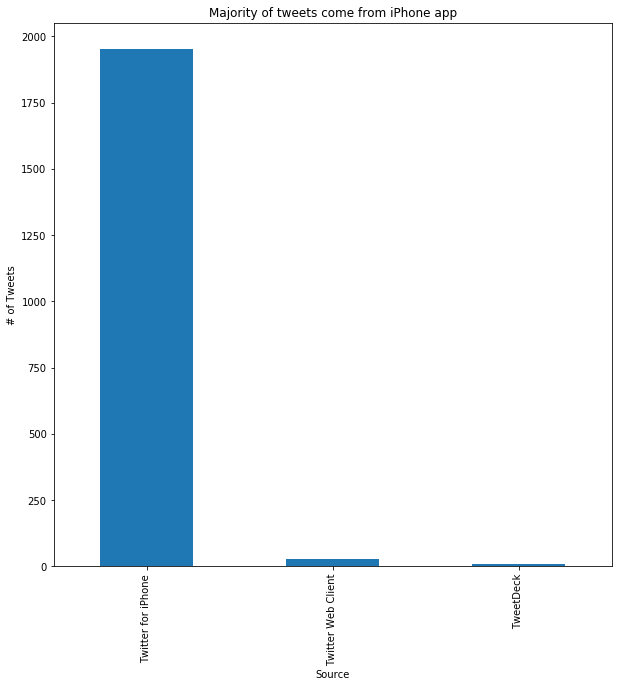

In [98]:
# create sources bar chart
plt.figure(figsize=[10,10])
plt.xlabel('Source')
plt.ylabel('# of Tweets')
plt.title('Majority of tweets come from iPhone app')
source_data.value_counts().plot(kind='bar');

plt.savefig('tweet_sources.png')

In [99]:
# view distribution of tweet sources
master.new_source.value_counts()

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               10
Name: new_source, dtype: int64

#### Analysis of Image Predictions

In [100]:
# create dataframe of predictions for analysis
predictions = master[reordered_3]

In [101]:
# view dataframe
predictions

,predict_1,confidence_1,isdog_1,predict_2,confidence_2,isdog_2,predict_3,confidence_3,isdog_3
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [102]:
# filter for observations with dog predictions
true_predictions = (predictions.isdog_1 == True) | (predictions.isdog_2 == True) | (predictions.isdog_3 == True)

In [103]:
# view predictions where isdog field is true in at least one of three columns
predictions[true_predictions]

,predict_1,confidence_1,isdog_1,predict_2,confidence_2,isdog_2,predict_3,confidence_3,isdog_3
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
10,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


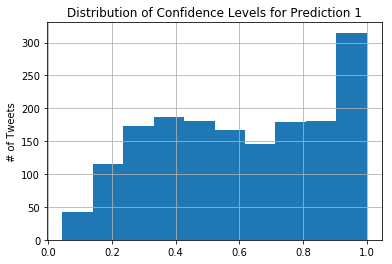

In [109]:
# create histogram of confidence for true predictions from prediction 1
con_1_plot = predictions[true_predictions]['confidence_1']

con_1_plot.hist()

plt.ylabel('# of Tweets')
plt.title('Distribution of Confidence Levels for Prediction 1')
plt.savefig('con_1.png')
plt.show();



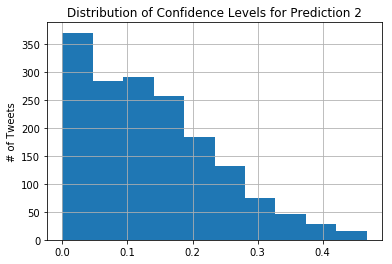

In [110]:
# create histogram of confidence for true predictions from prediction 2
con_2_plot = predictions[true_predictions]['confidence_2']

con_2_plot.hist()

plt.ylabel('# of Tweets')
plt.title('Distribution of Confidence Levels for Prediction 2')
plt.savefig('con_2.png')
plt.show();



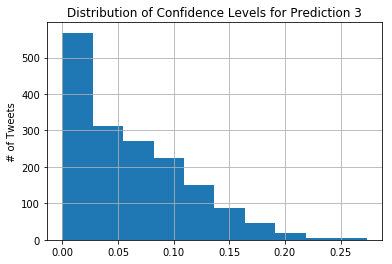

In [111]:
# create histogram of confidence for true predictions from prediction 1
con_3_plot = predictions[true_predictions]['confidence_3']

con_3_plot.hist()

plt.ylabel('# of Tweets')
plt.title('Distribution of Confidence Levels for Prediction 3')
plt.savefig('con_3.png')
plt.show();



In [107]:
predictions[true_predictions].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])

,confidence_1,isdog_1,confidence_2,isdog_2,confidence_3,isdog_3
0.1,0.242752,0.0,0.014844,0.0,0.003042,0.0
0.2,0.334056,1.0,0.040519,1.0,0.009690,1.0
0.3,0.420432,1.0,0.068716,1.0,0.021806,1.0
0.4,0.509897,1.0,0.096116,1.0,0.037169,1.0
0.5,0.606701,1.0,0.121432,1.0,0.049951,1.0
0.6,0.713491,1.0,0.152780,1.0,0.068619,1.0
0.7,0.805149,1.0,0.180378,1.0,0.085298,1.0
0.8,0.890733,1.0,0.220189,1.0,0.105039,1.0
0.9,0.963876,1.0,0.278391,1.0,0.134564,1.0


In [108]:
predictions[true_predictions].describe()

,confidence_1,confidence_2,confidence_3
count,1684.000000,1684.000000,1.684000e+03
mean,0.604921,0.137147,6.139723e-02
std,0.266404,0.101204,5.189011e-02
min,0.044333,0.000010,2.160900e-07
25%,0.378520,0.054946,1.603040e-02
50%,0.606701,0.121432,4.995100e-02
75%,0.850559,0.198383,9.470035e-02
max,0.999984,0.467678,2.734190e-01


##### Results
- prediction 1 has confidence rates between 0 and 100%
- all prediction 2 ratings are less than 50%
- all prediction 3 ratings are less than 30%